In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df_raw = pd.read_csv('airbnb.csv')

In [44]:
# Airbnb Hosts
# keep address[city, state, country], price, bathrooms, beds, guests, bedrooms

# *== Reducing the dimentiality of the dataset ==* //
df = df_raw[['address', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms']]

In [45]:
# Removed rows in the address which 
df = df_raw[['address', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms']]

for index, row in df.iterrows():
	commas = 0
	for char in row['address']:
		if char == ',':
			commas += 1
	if commas != 2:
		df = df.drop(index)

In [46]:
# Split the address column into city, state and country columns and dropped the address column
df[['city', 'state/province', 'country']] = df['address'].str.split(", ",expand=True)
df = df.drop(['address'], axis=1)
df = df.dropna(subset=['price'])
df

,price,bathrooms,beds,guests,bedrooms,city,state/province,country
0,8078,1,1,2,2,Kartepe,Kocaeli,Turkey
1,4665,2,2,4,2,Kaş,Antalya,Turkey
3,11339,1,2,4,1,Sapanca,Sakarya,Turkey
4,6673,1,1,2,1,Sapanca,Sakarya,Turkey
5,14729,1,2,2,1,Sapanca,Sakarya,Turkey
...,...,...,...,...,...,...,...,...
12796,6342,1,3,4,0,Pomer,Istarska županija,Croatia
12797,9909,1,3,4,1,Uruma,Okinawa,Japan
12799,20311,2,4,8,4,Syracuse,Sicilia,Italy
12803,42262,2,4,8,2,Gunung Sari,Nusa Tenggara Barat,Indonesia


<Axes: xlabel='country'>

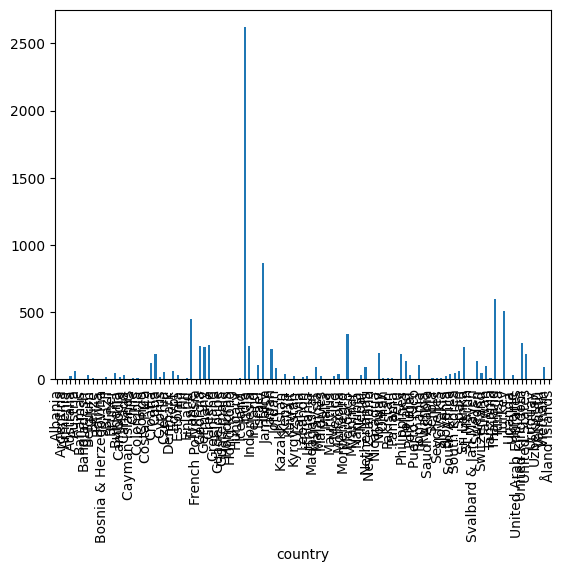

In [47]:
# Look at where the Airbnb's are located (for fun)
import matplotlib
from matplotlib import pylab

GroupByCountry = df.groupby('country')
GroupByCountry.size().plot(kind='bar')

In [48]:
moreThan10 = GroupByCountry.filter(lambda x: len(x) > 10)
moreThan10 = moreThan10.groupby(['country'])
moreThan10.count()

,price,bathrooms,beds,guests,bedrooms,city,state/province
country,,,,,,,
Australia,25,25,25,25,25,25,25
Austria,59,59,59,59,59,59,59
Belgium,33,33,33,33,33,33,33
Brazil,15,15,15,15,15,15,15
Bulgaria,46,46,46,46,46,46,46
Cambodia,14,14,14,14,14,14,14
Canada,35,35,35,35,35,35,35
Colombia,11,11,11,11,11,11,11
Croatia,122,122,122,122,122,122,122


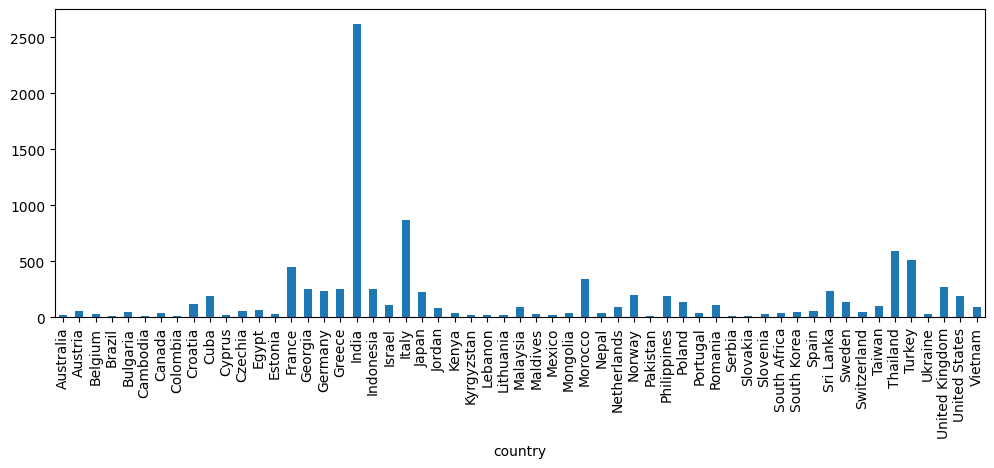

In [49]:
import matplotlib.pyplot as plt

myplot= moreThan10.size().plot(kind='bar')
fig = plt.gcf() # This will get the current figure (gcf duh)
fig.set_size_inches(12, 4) # (width, height)
plt.show()

In [50]:
list_of_countries = set()

for index, row in df.iterrows():
	list_of_countries.add(row['country'])
	# for char in row['address']:
	# 	if char == ',':
	# 		commas += 1
	# if commas != 2:
	# 	df = df.drop(index)
print(list_of_countries)


{'Puerto Rico', 'Maldives', 'Åland Islands', 'Poland', 'Albania', 'Hungary', 'France', 'Costa Rica', 'Saudi Arabia', None, 'Serbia', 'Egypt', 'Bolivia', 'Kyrgyzstan', 'India', 'Sweden', 'Sri Lanka', 'Greece', 'Fiji', 'Congo', 'Ukraine', 'Croatia', 'Armenia', 'Argentina', 'Kazakhstan', 'New Zealand', 'Kenya', 'Cyprus', 'Romania', 'Germany', 'Uruguay', 'Portugal', 'Mexico', 'Finland', 'Malaysia', 'Canada', 'Philippines', 'Seychelles', 'United Kingdom', 'Vietnam', 'Panama', 'Oman', 'Svalbard & Jan Mayen', 'Taiwan', 'Italy', 'Guadeloupe', 'South Korea', 'Malta', 'United States', 'Mauritius', 'Jamaica', 'St Martin', 'Hong Kong', 'Iceland', 'Belgium', 'Norway', 'Turkey', 'Australia', 'Spain', 'Slovenia', 'Tunisia', 'Brazil', 'Latvia', 'Honduras', 'Czechia', 'United Arab Emirates', 'Belize', 'Nicaragua', 'French Polynesia', 'Lebanon', 'Chile', 'Lithuania', 'Madagascar', 'Rwanda', 'Cayman Islands', 'Jordan', 'Cuba', 'Ireland', 'Greenland', 'Uganda', 'Netherlands', 'Pakistan', 'Vanuatu', 'Mongo

In [63]:
currency_conversion_to_usd = {
    'Puerto Rico': 1.0,  # USD to USD (Puerto Rico uses USD)
    'Maldives': 0.065,  # MVR to USD
    'Åland Islands': 1.1,  # EUR to USD (Åland Islands use Euro)
    'Poland': 0.26,  # PLN to USD
    'Albania': 0.0092,  # ALL to USD
    'Hungary': 0.0034,  # HUF to USD
    'France': 1.1,  # EUR to USD
    'Costa Rica': 0.0017,  # CRC to USD
    'Saudi Arabia': 0.27,  # SAR to USD
    'Serbia': 0.0092,  # RSD to USD
    'Egypt': 0.032,  # EGP to USD
    'Bolivia': 0.14,  # BOB to USD
    'Kyrgyzstan': 0.011,  # KGS to USD
    'India': 0.012,  # INR to USD
    'Sweden': 0.11,  # SEK to USD
    'Sri Lanka': 0.0031,  # LKR to USD
    'Greece': 1.1,  # EUR to USD
    'Fiji': 0.45,  # FJD to USD
    'Congo': 0.0016,  # CDF to USD
    'Ukraine': 0.027,  # UAH to USD
    'Croatia': 0.16,  # HRK to USD
    'Armenia': 0.0025,  # AMD to USD
    'Argentina': 0.010,  # ARS to USD
    'Kazakhstan': 0.0023,  # KZT to USD
    'New Zealand': 0.61,  # NZD to USD
    'Kenya': 0.0071,  # KES to USD
    'Cyprus': 1.1,  # EUR to USD
    'Romania': 0.22,  # RON to USD
    'Germany': 1.1,  # EUR to USD
    'Uruguay': 0.026,  # UYU to USD
    'Portugal': 1.1,  # EUR to USD
    'Mexico': 0.053,  # MXN to USD
    'Finland': 1.1,  # EUR to USD
    'Malaysia': 0.22,  # MYR to USD
    'Canada': 0.75,  # CAD to USD
    'Philippines': 0.018,  # PHP to USD
    'Seychelles': 0.074,  # SCR to USD
    'United Kingdom': 1.3,  # GBP to USD
    'Vietnam': 0.000043,  # VND to USD
    'Panama': 1.0,  # USD to USD (Panama uses USD)
    'Oman': 2.60,  # OMR to USD
    'Svalbard & Jan Mayen': 0.10,  # NOK to USD (Norwegian Krone)
    'Taiwan': 0.032,  # TWD to USD
    'Italy': 1.1,  # EUR to USD
    'Guadeloupe': 1.1,  # EUR to USD
    'South Korea': 0.00084,  # KRW to USD
    'Malta': 1.1,  # EUR to USD
    'United States': 1.0,  # USD to USD
    'Mauritius': 0.023,  # MUR to USD
    'Jamaica': 0.0065,  # JMD to USD
    'St Martin': 1.1,  # EUR to USD (French side)
    'Hong Kong': 0.13,  # HKD to USD
    'Iceland': 0.0073,  # ISK to USD
    'Belgium': 1.1,  # EUR to USD
    'Norway': 0.10,  # NOK to USD
    'Turkey': 0.036,  # TRY to USD
    'Australia': 0.65,  # AUD to USD
    'Spain': 1.1,  # EUR to USD
    'Slovenia': 1.1,  # EUR to USD
    'Tunisia': 0.32,  # TND to USD
    'Brazil': 0.19,  # BRL to USD
    'Latvia': 1.1,  # EUR to USD
    'Honduras': 0.041,  # HNL to USD
    'Czechia': 0.045,  # CZK to USD
    'United Arab Emirates': 0.27,  # AED to USD
    'Belize': 0.50,  # BZD to USD
    'Nicaragua': 0.027,  # NIO to USD
    'French Polynesia': 0.0091,  # XPF to USD
    'Lebanon': 0.000066,  # LBP to USD
    'Chile': 0.0013,  # CLP to USD
    'Lithuania': 1.1,  # EUR to USD
    'Madagascar': 0.00022,  # MGA to USD
    'Rwanda': 0.00085,  # RWF to USD
    'Cayman Islands': 1.2,  # KYD to USD
    'Jordan': 1.41,  # JOD to USD
    'Cuba': 0.038,  # CUP to USD
    'Ireland': 1.1,  # EUR to USD
    'Greenland': 0.15,  # DKK to USD
    'Uganda': 0.00027,  # UGX to USD
    'Netherlands': 1.1,  # EUR to USD
    'Pakistan': 0.0036,  # PKR to USD
    'Vanuatu': 0.0084,  # VUV to USD
    'Mongolia': 0.00034,  # MNT to USD
    'Morocco': 0.10,  # MAD to USD
    'Indonesia': 0.000066,  # IDR to USD
    'Switzerland': 1.1,  # CHF to USD
    'Bulgaria': 0.57,  # BGN to USD
    'Thailand': 0.032,  # THB to USD
    'Bosnia & Herzegovina': 0.57,  # BAM to USD
    'Myanmar': 0.00047,  # MMK to USD
    'Kuwait': 3.29,  # KWD to USD
    'Cambodia': 0.00024,  # KHR to USD
    'Bangladesh': 0.012,  # BDT to USD
    'Bahamas': 1.0,  # BSD to USD
    'Namibia': 0.071,  # NAD to USD
    'South Africa': 0.071,  # ZAR to USD
    'Montenegro': 1.1,  # EUR to USD
    'Georgia': 0.37,  # GEL to USD
    'Colombia': 0.00025,  # COP to USD
    'Tanzania': 0.00043,  # TZS to USD
    'Estonia': 1.1,  # EUR to USD
    'Nepal': 0.0075,  # NPR to USD
    'Slovakia': 1.1,  # EUR to USD
    'Austria': 1.1,  # EUR to USD
    'Israel': 0.28,  # ILS to USD
    'Japan': 0.009,  # JPY to USD
    'Peru': 0.27,  # PEN to USD
    'Guatemala': 0.13,  # GTQ to USD
    'Brunei': 0.74,  # BND to USD
    'Uzbekistan': 0.000082,  # UZS to USD
    'Denmark': 0.15,  # DKK to USD
}
currency_conversion_to_usd2 = {
    'Albania': 0.0092, 'Argentina': 0.010, 'Armenia': 0.0025, 'Australia': 0.65, 'Austria': 1.1,
    'Bangladesh': 0.012, 'Belize': 0.50, 'Belgium': 1.1, 'Bolivia': 0.14, 'Bosnia & Herzegovina': 0.57,
    'Brazil': 0.19, 'Brunei': 0.74, 'Bulgaria': 0.57, 'Cambodia': 0.00024, 'Canada': 0.75,
    'Cayman Islands': 1.2, 'Chile': 0.0013, 'Colombia': 0.00025, 'Costa Rica': 0.0017, 'Croatia': 0.16,
    'Cuba': 0.038, 'Cyprus': 1.1, 'Czechia': 0.045, 'Denmark': 0.15, 'Egypt': 0.032, 'Estonia': 1.1,
    'Fiji': 0.45, 'Finland': 1.1, 'French Polynesia': 0.0091, 'France': 1.1, 'Georgia': 0.37,
    'Germany': 1.1, 'Greece': 1.1, 'Greenland': 0.15, 'Guadeloupe': 1.1, 'Guatemala': 0.13, 'Honduras': 0.041,
    'Hong Kong': 0.13, 'Hungary': 0.0034, 'Iceland': 0.0073, 'India': 0.012, 'Indonesia': 0.000066,
    'Ireland': 1.1, 'Israel': 0.28, 'Italy': 1.1, 'Japan': 0.009, 'Jordan': 1.41, 'Kazakhstan': 0.0023,
    'Kenya': 0.0071, 'Kuwait': 3.29, 'Kyrgyzstan': 0.011, 'Latvia': 1.1, 'Lebanon': 0.000066, 'Lithuania': 1.1,
    'Madagascar': 0.00022, 'Malaysia': 0.22, 'Maldives': 0.065, 'Malta': 1.1, 'Mauritius': 0.023,
    'Mexico': 0.053, 'Mongolia': 0.00034, 'Morocco': 0.10, 'Montenegro': 1.1, 'Myanmar': 0.00047,
    'Namibia': 0.071, 'Nicaragua': 0.027, 'Netherlands': 1.1, 'New Zealand': 0.61, 'Oman': 2.60,
    'Pakistan': 0.0036, 'Panama': 1.0, 'Peru': 0.27, 'Philippines': 0.018, 'Poland': 0.26, 'Portugal': 1.1,
    'Puerto Rico': 1.0, 'Romania': 0.22, 'Rwanda': 0.00085, 'Saudi Arabia': 0.27, 'Serbia': 0.0092,
    'Seychelles': 0.074, 'Singapore': 0.74, 'Slovakia': 1.1, 'Slovenia': 1.1, 'South Africa': 0.071,
    'South Korea': 0.00084, 'Sri Lanka': 0.0031, 'Sweden': 0.11, 'Switzerland': 1.1, 'Svalbard & Jan Mayen': 0.10,
    'Taiwan': 0.032, 'Tanzania': 0.00043, 'Thailand': 0.032, 'Turkey': 0.036, 'Ukraine': 0.027,
    'United Arab Emirates': 0.27, 'United Kingdom': 1.3, 'United States': 1.0, 'Uruguay': 0.026,
    'Uzbekistan': 0.000082, 'Vanuatu': 0.0084, 'Vietnam': 0.000043
}

In [70]:
def convert_to_usd(row):
    country = row['country']
    price = row['price']
    conversion_rate = currency_conversion_to_usd.get(country)
    # print(country, price, conversion_rate)
    return price * conversion_rate


In [71]:
prices_in_usd_df = df
cleaned = prices_in_usd_df.dropna()
for index, row in cleaned.iterrows():
	# row['price'] = row['price'] * currency_conversion_to_usd[row['country']]
	row['price_in_usd'] = convert_to_usd(row)
	# print(row['price']*currency_conversion_to_usd[row['country']])
cleaned

,price,bathrooms,beds,guests,bedrooms,city,state/province,country
0,8078,1,1,2,2,Kartepe,Kocaeli,Turkey
1,4665,2,2,4,2,Kaş,Antalya,Turkey
3,11339,1,2,4,1,Sapanca,Sakarya,Turkey
4,6673,1,1,2,1,Sapanca,Sakarya,Turkey
5,14729,1,2,2,1,Sapanca,Sakarya,Turkey
...,...,...,...,...,...,...,...,...
12796,6342,1,3,4,0,Pomer,Istarska županija,Croatia
12797,9909,1,3,4,1,Uruma,Okinawa,Japan
12799,20311,2,4,8,4,Syracuse,Sicilia,Italy
12803,42262,2,4,8,2,Gunung Sari,Nusa Tenggara Barat,Indonesia


In [73]:
cleaned['price'] = cleaned['price'].apply(convert_to_usd)
cleaned

TypeError: 'int' object is not subscriptable